In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.read_csv('G:\[GLODLS] UDEMY Tutorials - Learning Python for Data Analysis and Visualization\Loan_Prediction.csv')

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [6]:
df.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [6]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [7]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

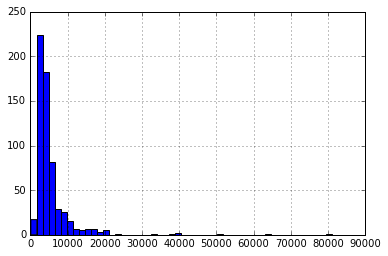

In [8]:
df['ApplicantIncome'].hist(bins=50)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xcf8ceb8>],
 'caps': [<matplotlib.lines.Line2D at 0xd032be0>,
 'fliers': [<matplotlib.lines.Line2D at 0xd03fba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xd03f710>],
 'whiskers': [<matplotlib.lines.Line2D at 0xd032080>,
  <matplotlib.lines.Line2D at 0xd032668>]}

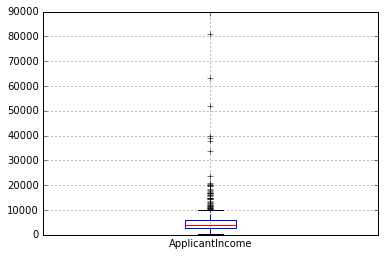

In [9]:
df.boxplot(column='ApplicantIncome')

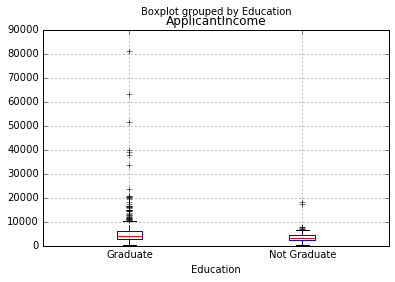

In [10]:
df.boxplot(column='ApplicantIncome', by = 'Education')

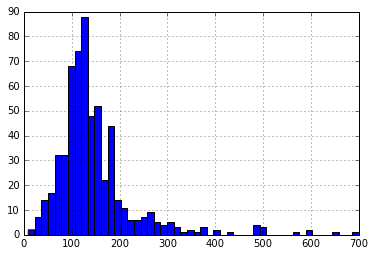

In [11]:
df['LoanAmount'].hist(bins=50)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xe04cb70>],
 'caps': [<matplotlib.lines.Line2D at 0xe05d7b8>,
 'fliers': [<matplotlib.lines.Line2D at 0xe069860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xe0692e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xe04ccf8>,
  <matplotlib.lines.Line2D at 0xe04c860>]}

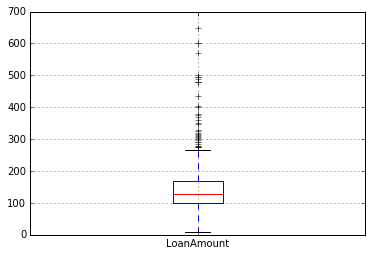

In [14]:
df.boxplot(column='LoanAmount')

In [15]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print 'Frequency Table for Credit History:' 
print temp1

print '\nProbility of getting loan for each Credit History class:' 
print temp2

Frequency Table for Credit History:
0     89
1    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0    0.078652
1    0.795789
Name: Loan_Status, dtype: float64


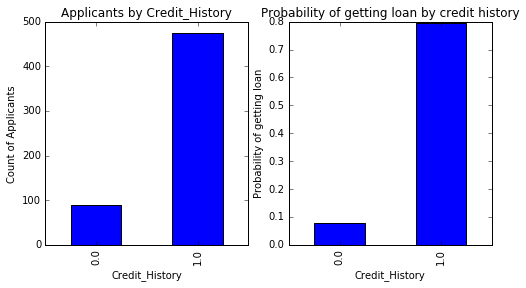

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

In [6]:
df = df.replace('Yes',1)
df = df.replace('No',0)

In [7]:
df['Self_Employed'].value_counts()

0    500
1     82
Name: Self_Employed, dtype: int64

In [17]:
temp2 = df.pivot_table(values='Loan_Status',index=['Self_Employed'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

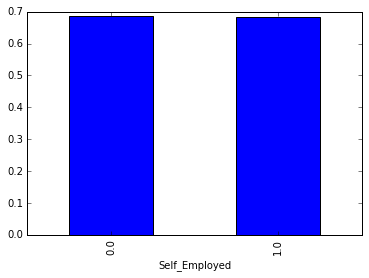

In [21]:
temp2.plot(kind = 'bar')

In [22]:
df['Married'].value_counts()

1    398
0    213
Name: Married, dtype: int64

Married
0    0.629108
1    0.716080
Name: Loan_Status, dtype: float64


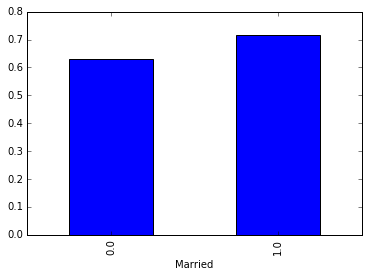

In [24]:
temp2 = df.pivot_table(values='Loan_Status',index=['Married'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print temp2
temp2.plot(kind = 'bar')

In [25]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [26]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])

In [27]:
temp3

Loan_Status,N,Y
Credit_History,,
0,82,7
1,97,378


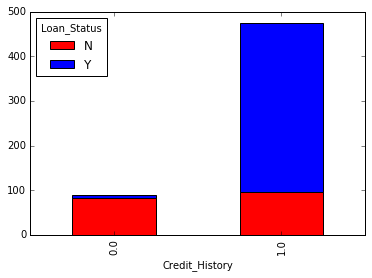

In [28]:
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [8]:
 # Finding Missing values in variables
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

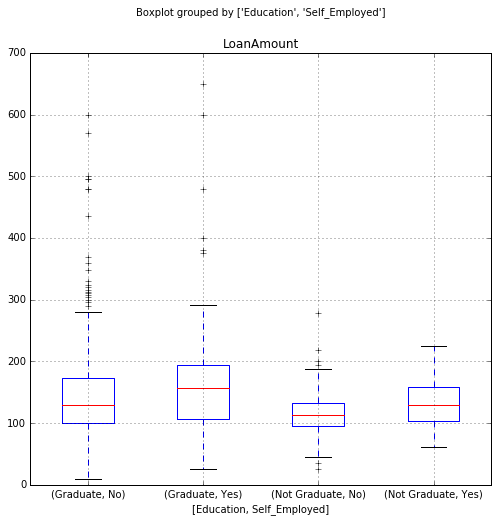

In [5]:
### Data Munging Begins ###

df.boxplot(column='LoanAmount',by=['Education','Self_Employed'],figsize=(8,8))

In [9]:
 df['Self_Employed'].fillna('No',inplace=True)

In [10]:
df['Self_Employed'].value_counts()

0.0    500
1.0     82
No      32
Name: Self_Employed, dtype: int64

In [12]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

In [13]:
table

Education,Graduate,Not Graduate
Self_Employed,,
0.0,130.0,113
1.0,157.5,130
No,125.0,123


In [14]:
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1323: FutureWarning: scalar indexers for index type Index should be integers and not floating point
  key = self._convert_scalar_indexer(key, axis)


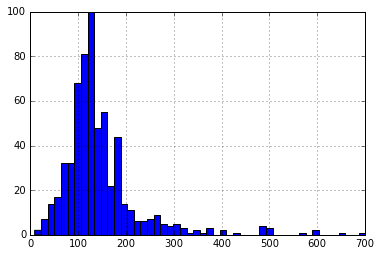

In [15]:
df['LoanAmount'].hist(bins=50)

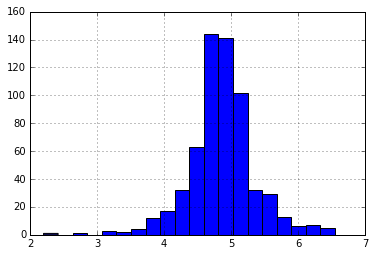

In [16]:
 df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Creating Varibale Total Income as Co-Applicant income counts even if the Applicant's Income is less


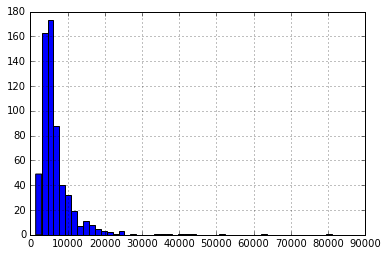

In [17]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'].hist(bins = 50)

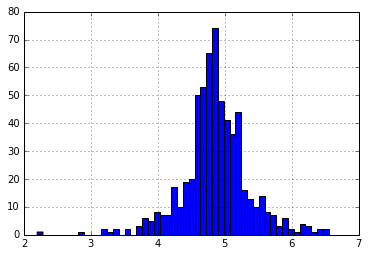

In [18]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=50)

In [20]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0,130,360,1,Urban,Y,4.867534,5849,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N,4.852030,6091,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y,4.189655,3000,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y,4.787492,4941,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y,4.948760,6000,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y,5.587249,9613,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y,4.553877,3849,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N,5.062595,5540,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y,5.123964,5532,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N,5.855072,23809,10.077819


In [28]:
 # Finding Missing values in variables
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [25]:
df['Credit_History'].value_counts()

1    475
0     89
Name: Credit_History, dtype: int64

In [22]:
df['Gender'].value_counts()
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

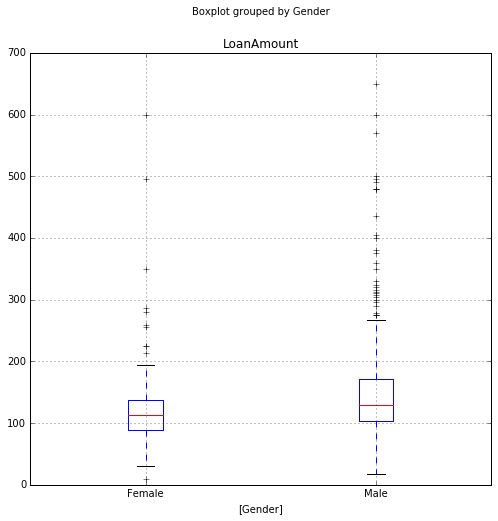

In [21]:
df.boxplot(column='LoanAmount',by=['Gender'],figsize=(8,8))

In [23]:
df['Credit_History'].unique()

array([  1.,   0.,  nan])

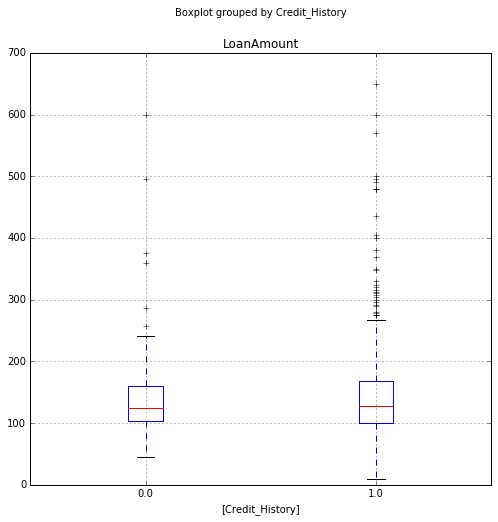

In [34]:
df.boxplot(column='LoanAmount',by=['Credit_History'],figsize=(8,8))

In [33]:
df['Credit_History']  =df['Credit_History'].fillna(1.0)

## Modelling Begins.Scikit Learn Lib used


In [36]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [37]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [39]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [38]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

## Logistic Regression 

In [40]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


# # Decision Trees


In [41]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%
